In [15]:
#import all the packages

from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [38]:
#Creation of synthetic data using make blobs
#Parameter - set number of samples = 200, features(dimensions) = 4, number of classes = 2, number of clusters = 2
samps = 200
feats = 4
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)

In [39]:
#Store the input data and the associated labels to a variable
X = Input_data[0]
Y = Input_data[1]

In [40]:
#We need to center this data to perform MDS 
X -= X.mean()

In [41]:
#Create a pandas data frame for the input data 
X_df = pd.DataFrame(X, columns=['dim'+ str(i) for i in range(1,feats+1)])
#X_df['y'] = Y

In [42]:
X_df

,dim1,dim2,dim3,dim4
0,2.325301,1.874685,-0.876431,-0.610870
1,1.724295,4.132070,-1.187405,-2.039697
2,1.018693,3.983917,-1.548578,-0.983422
3,1.183681,3.440733,-2.749289,0.867555
4,0.162671,5.665573,-1.803974,0.779202
...,...,...,...,...
195,0.010426,-4.008231,-1.821062,0.712707
196,-1.985004,-0.925696,-3.229295,1.056721
197,-0.860797,-1.819493,0.278195,-0.693792
198,-0.109830,-2.646694,-0.136160,0.302115


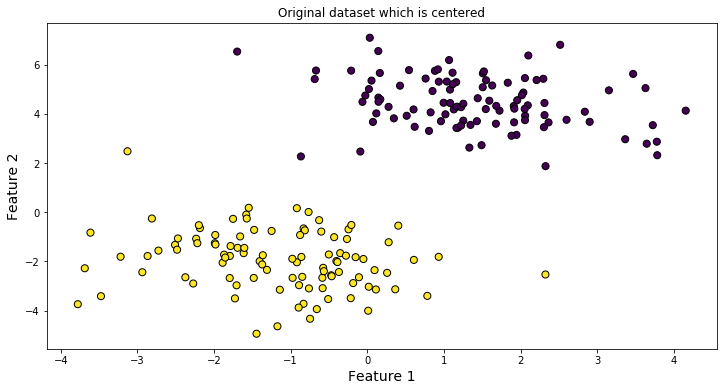

In [44]:
#Plot of the input data 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(X_df['dim1'], X_df['dim2'], s=50, c=Y, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset which is centered")
plt.show()

In [30]:
#Let's add noise dimensions to original dataset: given dataset dim = N,M
#i.e., initialise a random set of data points having dimensions (N,P) -> New data will have dim (N, M+P) 
noise_feats = 10 
noise = np.random.rand(samps, noise_feats)  #dim = 200x10
print(noise, noise.shape)

[[0.42697946 0.50775896 0.80760169 ... 0.52626997 0.58780835 0.59401577]
 [0.23832013 0.44237347 0.99826188 ... 0.46649952 0.95054608 0.63886859]
 [0.9743348  0.30912324 0.96551618 ... 0.32851323 0.83277172 0.1974374 ]
 ...
 [0.40240946 0.5521015  0.9223891  ... 0.49854227 0.42705846 0.06202681]
 [0.96002351 0.06264621 0.95794124 ... 0.27370706 0.61083488 0.60945165]
 [0.52077724 0.93570698 0.08908769 ... 0.07672227 0.74514816 0.3394241 ]] (200, 10)


In [45]:
#Center the noise as well
noise -= noise.mean()
#Create a pandas dataframe for the noise dimensional data 
noise_df = pd.DataFrame(noise, columns=['dim'+ str(i) for i in range(1,noise_feats+1)])
print(noise_df)

         dim1      dim2      dim3      dim4      dim5      dim6      dim7  \
0   -0.077146  0.003633  0.303476 -0.455886 -0.227904  0.113516 -0.006969   
1   -0.265806 -0.061752  0.494136  0.376809 -0.132617 -0.216419  0.450366   
2    0.470209 -0.195003  0.461390  0.433962 -0.439195  0.359482 -0.329234   
3    0.400628  0.165506  0.346153 -0.202645  0.168032 -0.340957 -0.243264   
4   -0.241529 -0.011202 -0.397686 -0.036040 -0.212735 -0.050642  0.257384   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.104749 -0.217222 -0.041320  0.165260 -0.442746 -0.024136 -0.294089   
196 -0.069332  0.172621  0.286407 -0.135170  0.213806  0.104814  0.465844   
197 -0.101716  0.047976  0.418263 -0.380630 -0.013282  0.108965  0.198527   
198  0.455898 -0.441480  0.453815  0.223942  0.167774  0.399759  0.492944   
199  0.016651  0.431581 -0.415038 -0.499274 -0.082088 -0.183205  0.136330   

         dim8      dim9     dim10  
0    0.022144  0.083683  0.089890  
1  

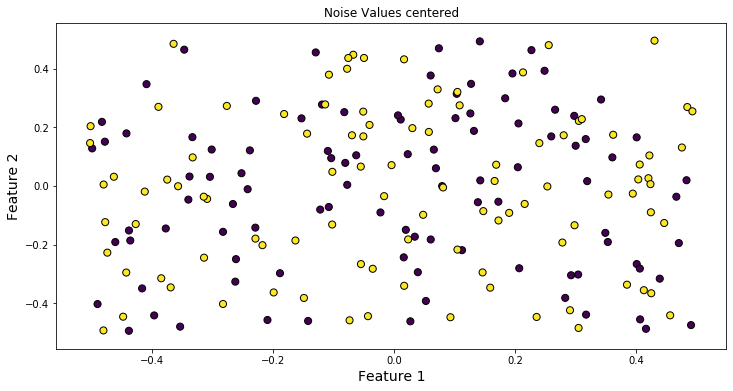

In [47]:
#Plot the 2 dimensions of the noise 
plt.figure(figsize=(12,6))   #initialise the size of the fig
#Plot the first two dimensions

plt.scatter(noise_df['dim1'], noise_df['dim2'], s=50, c=Y, edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Noise Values centered")
plt.show()

In [48]:
#concatenate the noise dimensions to the original datset 
input_tot = pd.concat([X_df, noise_df], axis=1) #dim = 200x14

In [49]:
input_tot

,dim1,dim2,dim3,dim4,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10
0,2.325301,1.874685,-0.876431,-0.610870,-0.077146,0.003633,0.303476,-0.455886,-0.227904,0.113516,-0.006969,0.022144,0.083683,0.089890
1,1.724295,4.132070,-1.187405,-2.039697,-0.265806,-0.061752,0.494136,0.376809,-0.132617,-0.216419,0.450366,-0.037626,0.446420,0.134743
2,1.018693,3.983917,-1.548578,-0.983422,0.470209,-0.195003,0.461390,0.433962,-0.439195,0.359482,-0.329234,-0.175613,0.328646,-0.306688
3,1.183681,3.440733,-2.749289,0.867555,0.400628,0.165506,0.346153,-0.202645,0.168032,-0.340957,-0.243264,-0.113855,0.440256,-0.462789
4,0.162671,5.665573,-1.803974,0.779202,-0.241529,-0.011202,-0.397686,-0.036040,-0.212735,-0.050642,0.257384,0.372625,-0.027578,0.326243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.010426,-4.008231,-1.821062,0.712707,0.104749,-0.217222,-0.041320,0.165260,-0.442746,-0.024136,-0.294089,0.199111,0.479179,0.375364
196,-1.985004,-0.925696,-3.229295,1.056721,-0.069332,0.172621,0.286407,-0.135170,0.213806,0.104814,0.465844,-0.300159,-0.103483,-0.029512
197,-0.860797,-1.819493,0.278195,-0.693792,-0.101716,0.047976,0.418263,-0.380630,-0.013282,0.108965,0.198527,-0.005584,-0.077067,-0.442099
198,-0.109830,-2.646694,-0.136160,0.302115,0.455898,-0.441480,0.453815,0.223942,0.167774,0.399759,0.492944,-0.230419,0.106709,0.105326


In [50]:
#First we run the RF algorithm for this given noise dimsensions
#Generate the proximity matrix -> distance matrix -> clustering on the output itself -> MDS 
#-> reduce various number of dimension and check clustering on this

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
#Function to create a proximity matrix
#I/p params : The model we're using of RF, the input data that the model is being applied to 

#That is, for all pairs of samples in your dataset, 
#iterate over the decision trees in the forest and count the number of times they fall in the same leaf 
#i.e., the number of times 'apply' gives the same node id for both samples in the pair.

#LINK FOR GENERATING THE PROXIMITY MATRIX:-
#https://stackoverflow.com/questions/18703136/proximity-matrix-in-sklearn-ensemble-randomforestclassifier

def proximityMatrix(model, X, normalize=True):      

    terminals = model.apply(X)
    nTrees = terminals.shape[1]

    a = terminals[:,0]
    proxMat = 1*np.equal.outer(a, a)

    for i in range(1, nTrees):
        a = terminals[:,i]
        proxMat += 1*np.equal.outer(a, a)

    if normalize:
        proxMat = proxMat / nTrees

    return proxMat   


In [53]:
#Define a random forest classfier model

model_rf = RandomForestClassifier(n_estimators=100, random_state=1, max_features = 'sqrt')
model_rf.fit(input_tot, Y)
#Calling the proximity matrix function to obtain the proximity matrix from the RF model.

prox_mat = proximityMatrix(model_rf, input_tot, normalize=True)

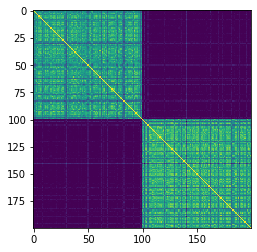

In [54]:
#Display the proximity matrix 
plt.imshow(prox_mat)

(200, 200)

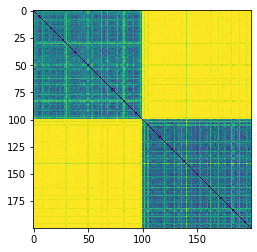

In [58]:
dis_mat = 1 - prox_mat  #Creating a dissimilarity matrix
plt.imshow(dis_mat)
dis_mat.shape

In [59]:
dis_mat - dis_mat.T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [60]:
def isSymmetric(mat, N): 
    for i in range(N): 
        for j in range(N): 
            if (mat[i][j] != mat[j][i]): 
                return False
    return True

In [61]:
if (isSymmetric(dis_mat, 200)): 
    print ("Yes")
else: 
    print ("No")

Yes


In [67]:
#Performing clustering on the output of the RF to check its efficiency without MDS

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(prox_mat) 
score = adjusted_rand_score(Y, predict_labels)

print("labels\n", Y) #True labels
print("predict\n", predict_labels) #Labels that were predicted
print("Adjusted Rand Score:", score) #Adjusted rand score to check how well the clusters are identified.

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted Rand Score: 1.0


In [69]:
#Clustering for non-euclidean 
clust1 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single")
clust2 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="complete")
clust3 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="average")

pred_labels1 = clust1.fit_predict(dis_mat) 
pred_labels2 = clust2.fit_predict(dis_mat) 
pred_labels3 = clust3.fit_predict(dis_mat)

score_1 = adjusted_rand_score(Y, pred_labels1)
score_2 = adjusted_rand_score(Y, pred_labels2)
score_3 = adjusted_rand_score(Y, pred_labels3)


print("Adjusted Rand Score:", score_1, score_2, score_3) #Adjusted rand score to check how well the clusters are identified.

Adjusted Rand Score: 1.0 0.9799995050507551 1.0


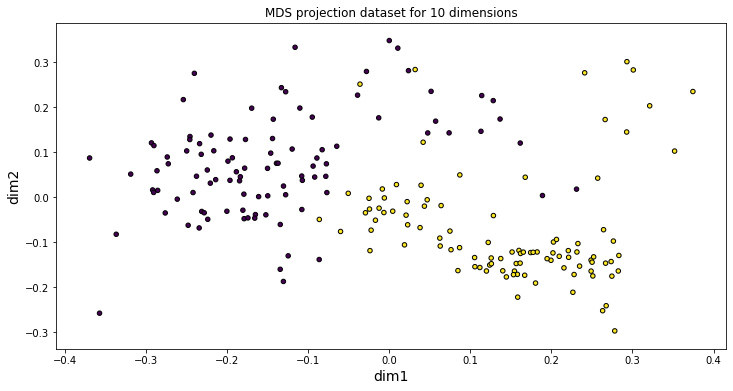

In [91]:
#Perform MDS on the RF's proximity matrix -> dissimilarity matrix = 1 - proximity matrix
#Reducing the number of dimensions from 14 to 10
#This is for metric MDS 
from sklearn.manifold import MDS

model_mds2 = MDS(n_components=10, metric = True, dissimilarity='precomputed', random_state=1)

embed = model_mds2.fit_transform(dis_mat)

plt.figure(figsize=(12,6))
plt.scatter(embed[:, 0], embed[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset for 10 dimensions")
plt.show()

In [93]:
#Perform agglomerative clustering to check the efficiency of MDS's dimensionality reduction: We went from 14 -> 10 dims
#check if the clusters are identified using the agglomerative clustering 
clust_rf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_rf = clust_rf.fit_predict(embed)
score_rf = adjusted_rand_score(Y, predict_rf)

print("labels\n", Y)
print("predict\n", predict_rf)
print("Adjusted Rand Score:", score_rf)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
predict
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Adjusted Rand Score: 1.0


In [114]:
val = [10, 8, 6, 4, 2] 
mds_models = []
for i in val: 
    mds_models.append( MDS(n_components=i, metric = True, dissimilarity='precomputed', random_state=1))
print(mds_models)

[MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=10, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=8, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=6, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=4, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=1, verbose=0)]


In [145]:
embed1 = []
embed2 = []
embed3 = []
embed4 = []
embed5 = []

    
embed1 = mds_models[0].fit_transform(dis_mat)
embed2 = mds_models[1].fit_transform(dis_mat)
embed3 = mds_models[2].fit_transform(dis_mat)
embed4 = mds_models[3].fit_transform(dis_mat)
embed5 = mds_models[4].fit_transform(dis_mat)  

print(embed1.shape)
print(embed2.shape)
print(embed3.shape)
print(embed4.shape)
print(embed5.shape)
    


(200, 10)
(200, 8)
(200, 6)
(200, 4)
(200, 2)


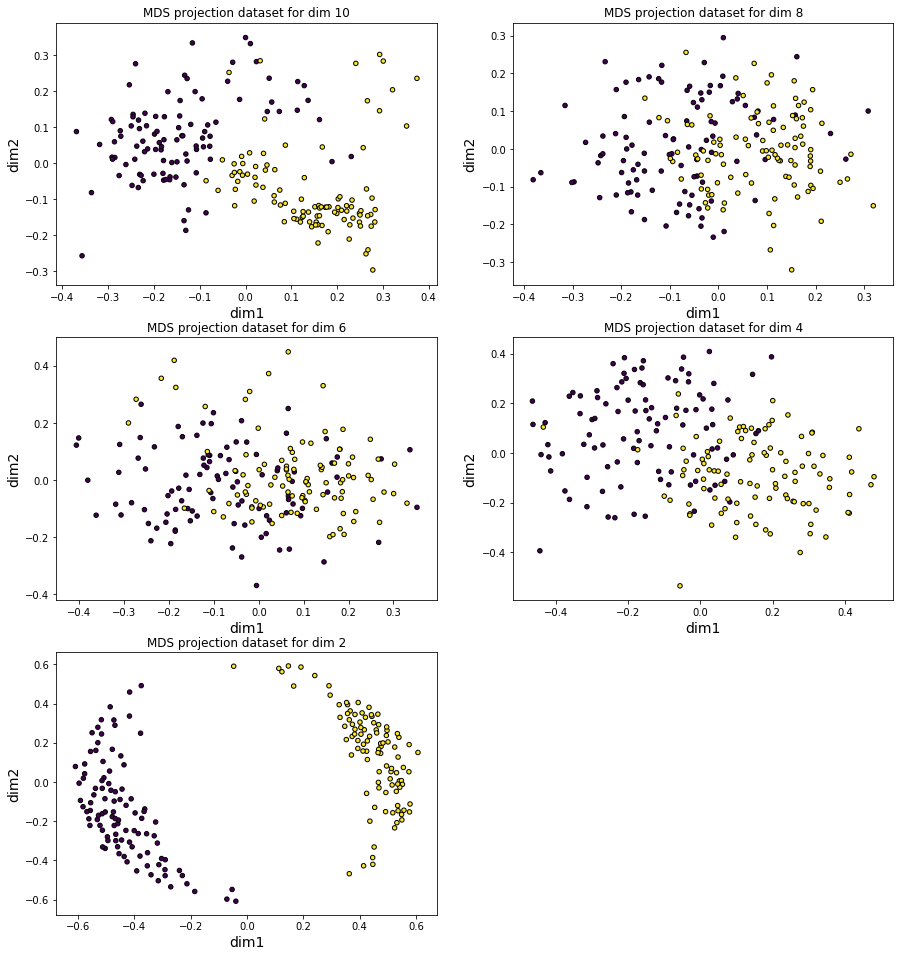

In [164]:
#Scatter plot to show the MDS projection of the reduced dimensions
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed1[:, 0], embed1[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 10")

plt.subplot(5,2,2)
plt.scatter(embed2[:, 0], embed2[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 8")

plt.subplot(5,2,3)
plt.scatter(embed3[:, 0], embed3[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 6")

plt.subplot(5,2,4)
plt.scatter(embed4[:, 0], embed4[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 4")

plt.subplot(5,2,5)
plt.scatter(embed5[:, 0], embed5[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 2")
plt.show()

In [165]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

clust_rf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_rf1 = clust_rf.fit_predict(embed1)
predict_rf2 = clust_rf.fit_predict(embed2)
predict_rf3 = clust_rf.fit_predict(embed3)
predict_rf4 = clust_rf.fit_predict(embed4)
predict_rf5 = clust_rf.fit_predict(embed5)

score_rf1 = adjusted_rand_score(Y, predict_rf1)
score_rf2 = adjusted_rand_score(Y, predict_rf2)
score_rf3 = adjusted_rand_score(Y, predict_rf3)
score_rf4 = adjusted_rand_score(Y, predict_rf4)
score_rf5 = adjusted_rand_score(Y, predict_rf5)

print("labels\n", Y)
#print("predict\n", predict_rf)
print("Adjusted Rand Score:", score_rf1,score_rf2, score_rf3, score_rf4, score_rf5)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 1.0 1.0 1.0 1.0 1.0


In [173]:
from rerf.urerf import UnsupervisedRandomForest
#Define the USPORF model
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=1)
#Fit this model to the input data 
clf.fit(input_tot)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=1)

[[1.   0.05 0.01 ... 0.12 0.01 0.  ]
 [0.09 1.   0.03 ... 0.04 0.04 0.  ]
 [0.05 0.07 1.   ... 0.   0.07 0.  ]
 ...
 [0.12 0.03 0.01 ... 1.   0.02 0.02]
 [0.02 0.06 0.02 ... 0.01 1.   0.  ]
 [0.   0.01 0.   ... 0.02 0.   1.  ]]


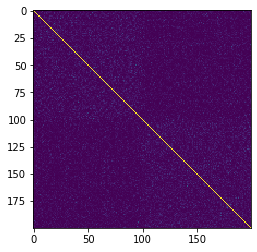

In [174]:
#Store the ouput of USPORF which is a similarity matrix and plot 
sim_mat = clf.transform()
print(sim_mat)
plt.imshow(sim_mat)

In [175]:
#According to the previous run experiments, we found that the similarity matrix isn't truely symmetric 
#Utilize the grapsy function to make it symmetric 
def symmetrize(graph, method="avg"):

    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

[[1.    0.07  0.03  ... 0.12  0.015 0.   ]
 [0.07  1.    0.05  ... 0.035 0.05  0.005]
 [0.03  0.05  1.    ... 0.005 0.045 0.   ]
 ...
 [0.12  0.035 0.005 ... 1.    0.015 0.02 ]
 [0.015 0.05  0.045 ... 0.015 1.    0.   ]
 [0.    0.005 0.    ... 0.02  0.    1.   ]]


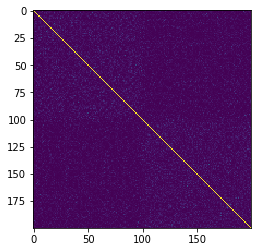

In [176]:
#New similarity matrix after making it symmetric
new_sim = symmetrize(sim_mat)
print(new_sim)
plt.imshow(new_sim)

[[0.    0.93  0.97  ... 0.88  0.985 1.   ]
 [0.93  0.    0.95  ... 0.965 0.95  0.995]
 [0.97  0.95  0.    ... 0.995 0.955 1.   ]
 ...
 [0.88  0.965 0.995 ... 0.    0.985 0.98 ]
 [0.985 0.95  0.955 ... 0.985 0.    1.   ]
 [1.    0.995 1.    ... 0.98  1.    0.   ]]


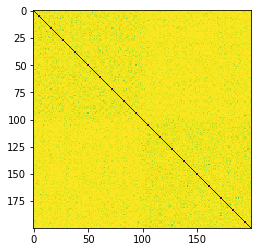

In [177]:
#Create a dissimilarity matrix by 1-new_sim
dis_mat_usporf = 1 - new_sim
print(dis_mat_usporf)
plt.imshow(dis_mat_usporf)

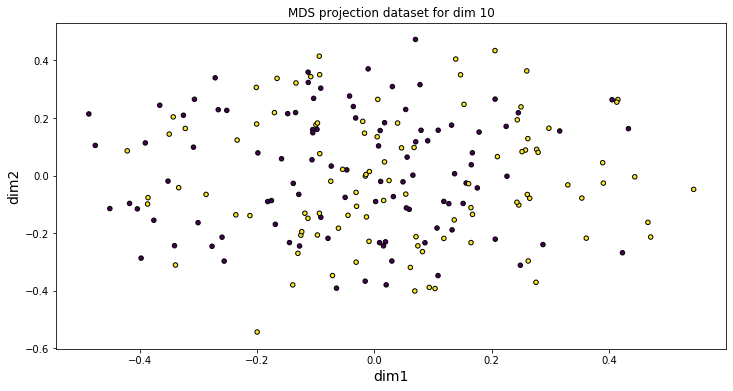

In [178]:
#MDS for the output of USPORF's dissilimilarity matrix
mds_usporf = MDS(n_components=10, metric = True, dissimilarity='precomputed', random_state=1)

embed_usporf = mds_usporf.fit_transform(dis_mat_usporf)
plt.figure(figsize=(12,6)) 

plt.scatter(embed_usporf[:, 0], embed_usporf[:, 1], s = 20, c = Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)

plt.title("MDS projection dataset for dim 10")
plt.show()

In [180]:
#check if the clusters are identified using the agglomerative clustering 
clust_usporf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
pred = clust_usporf.fit_predict(embed_usporf)
sc = adjusted_rand_score(Y, pred)

print("True Labels", Y)
print("Predicted labels", pred)
print("Adjusted rand score", sc)

True Labels [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted labels [1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1
 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1
 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0]
Adjusted rand score 0.04371757994925907


In [181]:
 
mds_usporf_models = []
for i in val: 
    mds_usporf_models.append( MDS(n_components=i, metric = True, dissimilarity='precomputed', random_state=1))
print(mds_usporf_models)

[MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=10, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=8, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=6, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=4, n_init=4, n_jobs=None, random_state=1, verbose=0), MDS(dissimilarity='precomputed', eps=0.001, max_iter=300, metric=True,
    n_components=2, n_init=4, n_jobs=None, random_state=1, verbose=0)]


In [186]:
embed1_usporf = []
embed2_usporf = []
embed3_usporf = []
embed4_usporf = []
embed5_usporf = []

    
embed1_usporf = mds_usporf_models[0].fit_transform(dis_mat_usporf)
embed2_usporf = mds_usporf_models[1].fit_transform(dis_mat_usporf)
embed3_usporf = mds_usporf_models[2].fit_transform(dis_mat_usporf)
embed4_usporf = mds_usporf_models[3].fit_transform(dis_mat_usporf)
embed5_usporf = mds_usporf_models[4].fit_transform(dis_mat_usporf)  

print(embed1_usporf.shape)
print(embed2_usporf.shape)
print(embed3_usporf.shape)
print(embed4_usporf.shape)
print(embed5_usporf.shape)

(200, 10)
(200, 8)
(200, 6)
(200, 4)
(200, 2)


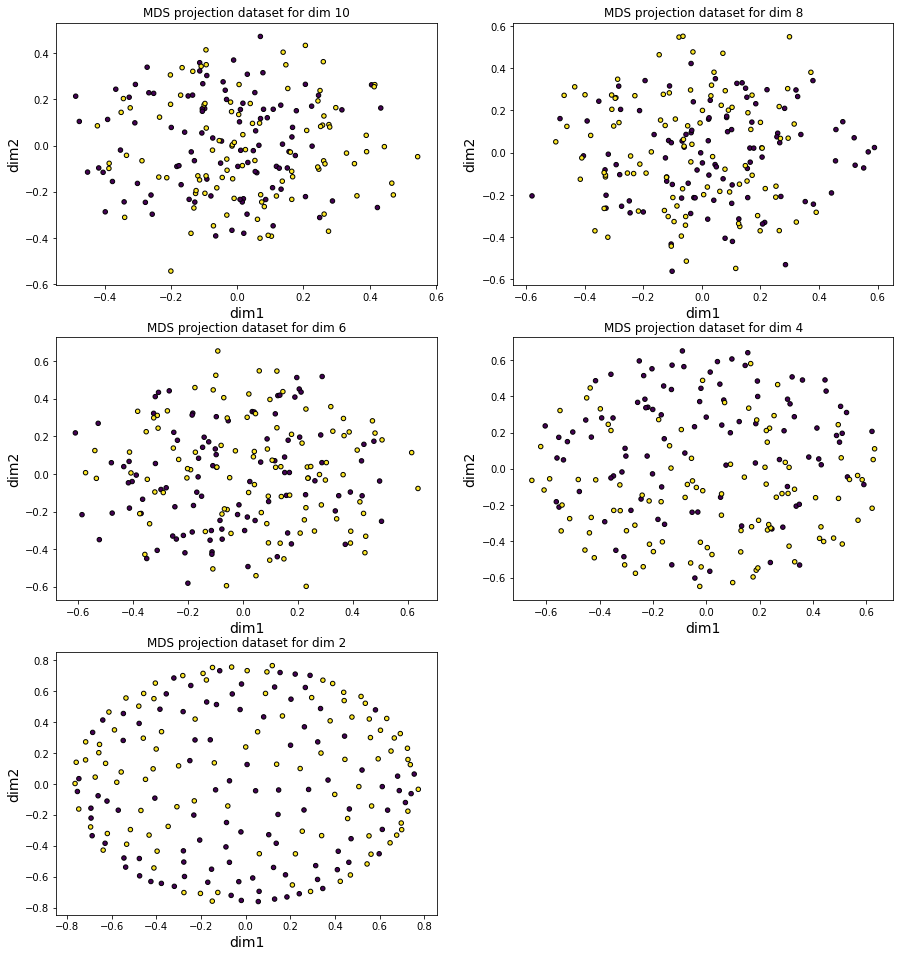

In [187]:
#Scatter plot to show the MDS projection of the reduced dimensions
plt.figure(figsize=(15,28))
plt.subplot(5,2,1)
plt.scatter(embed1_usporf[:, 0], embed1_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 10")

plt.subplot(5,2,2)
plt.scatter(embed2_usporf[:, 0], embed2_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 8")

plt.subplot(5,2,3)
plt.scatter(embed3_usporf[:, 0], embed3_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 6")

plt.subplot(5,2,4)
plt.scatter(embed4_usporf[:, 0], embed4_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 4")

plt.subplot(5,2,5)
plt.scatter(embed5_usporf[:, 0], embed5_usporf[:, 1],s = 20, c=Y, edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("MDS projection dataset for dim 2")
plt.show()

In [189]:
#Perform clusterning on this output to check ARI

#If “precomputed”, a distance matrix (instead of a similarity matrix) is needed as input for the fit method.

clust_usporf = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_usporf1 = clust_rf.fit_predict(embed1_usporf)
predict_usporf2 = clust_rf.fit_predict(embed2_usporf)
predict_usporf3 = clust_rf.fit_predict(embed3_usporf)
predict_usporf4 = clust_rf.fit_predict(embed4_usporf)
predict_usporf5 = clust_rf.fit_predict(embed5_usporf)

score_usporf1 = adjusted_rand_score(Y, predict_usporf1)
score_usporf2 = adjusted_rand_score(Y, predict_usporf2)
score_usporf3 = adjusted_rand_score(Y, predict_usporf3)
score_usporf4 = adjusted_rand_score(Y, predict_usporf4)
score_usporf5 = adjusted_rand_score(Y, predict_usporf5)

print("labels\n", Y)
#print("predict\n", predict_rf)
print("Adjusted Rand Score:", score_usporf1,score_usporf2, score_usporf3, score_usporf4, score_usporf5)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Adjusted Rand Score: 0.04371757994925907 -0.0025130691210167775 0.001389887758482758 0.05345995752275286 -0.004888590141713515
